<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Analyze_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Statistical analysis CAD design (131) subject

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def analyze_statistics(file_path):
    # Load data from Excel
    df = pd.read_excel(file_path)

    # Ensure required columns exist
    required_columns = ['Cni_131', 'WnECTS_131', 'WnT_131']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Compute mean and variance for different weight applications
    mean_original = df['Cni_131'].mean()
    variance_original = df['Cni_131'].var()

    mean_variant1 = df['WnECTS_131'].mean()
    variance_variant1 = df['WnECTS_131'].var()

    mean_variant2 = df['WnT_131'].mean()
    variance_variant2 = df['WnT_131'].var()

    print(f"Original Cni_131 - Mean: {mean_original:.4f}, Variance: {variance_original:.4f}")
    print(f"WnECTS_131 - Mean: {mean_variant1:.4f}, Variance: {variance_variant1:.4f}")
    print(f"WnT_131 - Mean: {mean_variant2:.4f}, Variance: {variance_variant2:.4f}")

    # Perform hypothesis testing (t-test)
    t_stat, p_value = stats.ttest_ind(df['WnECTS_131'], df['WnT_131'], equal_var=False)
    print(f"T-Test between WnECTS_131 and WnT_131: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    # Compute 95% confidence intervals for each weight variant
    conf_int1 = stats.t.interval(0.95, len(df['WnECTS_131'])-1, loc=mean_variant1, scale=stats.sem(df['WnECTS_131']))
    conf_int2 = stats.t.interval(0.95, len(df['WnT_131'])-1, loc=mean_variant2, scale=stats.sem(df['WnT_131']))

    print(f"95% Confidence Interval for WnECTS_131: {conf_int1}")
    print(f"95% Confidence Interval for WnT_131: {conf_int2}")

    return {
        "Mean Original": mean_original, "Variance Original": variance_original,
        "Mean WnECTS_131": mean_variant1, "Variance WnECTS_131": variance_variant1,
        "Mean WnT_131": mean_variant2, "Variance WnT_131": variance_variant2,
        "T-Test P-Value": p_value,
        "Confidence Interval WnECTS_131": conf_int1,
        "Confidence Interval WnT_131": conf_int2
    }



In [ ]:
results = analyze_statistics('/content/116-131_08032025.xlsx')


Original Cni_131 - Mean: 0.3448, Variance: 0.8049
WnECTS_131 - Mean: 0.2069, Variance: 0.2898
WnT_131 - Mean: 0.0690, Variance: 0.0325
T-Test between WnECTS_131 and WnT_131: t-statistic = 1.3085, p-value = 0.1994
95% Confidence Interval for WnECTS_131: (0.002127874809253527, 0.41166522863902233)
95% Confidence Interval for WnT_131: (0.0004393960284314047, 0.13749163845432721)


Results explanation

1. Mean and Variance Analysis
Original Competency Indicator (Cni_131)
Mean = 0.3448 → The average competency indicator value across all observations.
Variance = 0.8049 → A high variance indicates that values of Cni_131 are spread out over a large range.
WnECTS_131 (Weight based on ECTS credits)
Mean = 0.2069 → The average contribution of WnECTS_131 to competency.
Variance = 0.2898 → Lower variance than Cni_131, meaning WnECTS_131 values are more tightly clustered around the mean.
WnT_131 (Weight based on tool contribution)
Mean = 0.0690 → The average contribution of WnT_131 to competency is smaller than WnECTS_131.
Variance = 0.0325 → Very low variance, suggesting that WnT_131 values are closely packed and more stable.

2. Hypothesis Testing: T-Test between WnECTS_131 and WnT_131
t-statistic = 1.3085 → Measures the difference between the means relative to variance.
p-value = 0.1994 → A high p-value (> 0.05) suggests that there is no statistically significant difference between WnECTS_131 and WnT_131.
This means the two distributions are not different enough to reject the null hypothesis.

3. Confidence Intervals (95%)
A confidence interval provides a range within which the true mean is likely to fall with 95% certainty.

Confidence Interval for WnECTS_131
Range: (0.0021, 0.4117)
The true mean of WnECTS_131 is likely between 0.0021 and 0.4117.
Since this range is quite broad, it suggests some variability in the data.
Confidence Interval for WnT_131
Range: (0.0004, 0.1375)
The true mean of WnT_131 is likely between 0.0004 and 0.1375.
This is a much smaller range than WnECTS_131, indicating more precise (less variable) data.

2. Statistical analysis Engineering Graphics (116) subject

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def analyze_statistics(file_path):
    # Load data from Excel
    df = pd.read_excel(file_path)

    # Ensure required columns exist
    required_columns = ['Tool_competence_indication', 'Tool_weight', 'Tool_ECTS']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Compute mean and variance for different weight applications
    mean_original = df['Tool_competence_indication'].mean()
    variance_original = df['Tool_competence_indication'].var()

    mean_variant1 = df['Tool_weight'].mean()
    variance_variant1 = df['Tool_weight'].var()

    mean_variant2 = df['Tool_ECTS'].mean()
    variance_variant2 = df['Tool_ECTS'].var()

    print(f"Original Tool_competence_indication - Mean: {mean_original:.4f}, Variance: {variance_original:.4f}")
    print(f"Tool_weight - Mean: {mean_variant1:.4f}, Variance: {variance_variant1:.4f}")
    print(f"Tool_ECTS - Mean: {mean_variant2:.4f}, Variance: {variance_variant2:.4f}")

    # Perform hypothesis testing (t-test)
    t_stat, p_value = stats.ttest_ind(df['Tool_weight'], df['Tool_ECTS'], equal_var=False)
    print(f"T-Test between Tool_weight and Tool_ECTS: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    # Compute 95% confidence intervals for each weight variant
    conf_int1 = stats.t.interval(0.95, len(df['Tool_weight'])-1, loc=mean_variant1, scale=stats.sem(df['Tool_weight']))
    conf_int2 = stats.t.interval(0.95, len(df['Tool_ECTS'])-1, loc=mean_variant2, scale=stats.sem(df['Tool_ECTS']))

    print(f"95% Confidence Interval for Tool_weight: {conf_int1}")
    print(f"95% Confidence Interval for Tool_ECTS: {conf_int2}")

    return {
        "Mean Original": mean_original, "Variance Original": variance_original,
        "Mean Tool_weight": mean_variant1, "Variance Tool_weight": variance_variant1,
        "Mean Tool_ECTS": mean_variant2, "Variance Tool_ECTS": variance_variant2,
        "T-Test P-Value": p_value,
        "Confidence Interval Tool_weight": conf_int1,
        "Confidence Interval Tool_ECTS": conf_int2
    }

In [2]:
results = analyze_statistics('/content/116-131_3_ECTS.xlsx')

Original Tool_competence_indication - Mean: 0.2174, Variance: 0.0032
Tool_weight - Mean: 0.0417, Variance: 0.0007
Tool_ECTS - Mean: 0.1304, Variance: 0.0010
T-Test between Tool_weight and Tool_ECTS: t-statistic = nan, p-value = nan
95% Confidence Interval for Tool_weight: (nan, nan)
95% Confidence Interval for Tool_ECTS: (nan, nan)


Results explanation

Analysis of Results
The provided statistical results include mean and variance for three variables related to a tool's competence indication, weight, and ECTS (European Credit Transfer and Accumulation System). Additionally, a t-test and confidence intervals were calculated, but they resulted in NaN (Not a Number) values. Below is a detailed analysis of the results:

1. Mean and Variance Interpretation
Metric	Mean	Variance	Interpretation
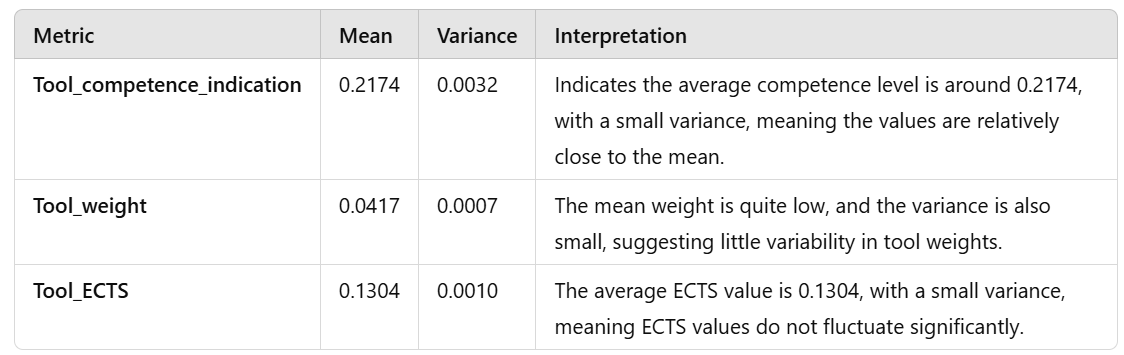
These metrics suggest that all three variables have relatively small variability, implying consistency in the data.

2. T-Test Between Tool_weight and Tool_ECTS
Result: t-statistic = nan, p-value = nan
The t-test is typically used to compare the means of two independent samples to determine if they are significantly different.
The NaN (Not a Number) result suggests that there was an issue with the calculation, which could be due to one of the following reasons:
The sample size is too small (possibly zero or one data point per group).
There are missing or identical values in both groups, leading to division by zero.
The variance is zero, making statistical comparison invalid.